In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [46]:
pd.set_option('display.max_columns', None)
df_cash = pd.read_csv("extract - cash request - data analyst.csv")
df_fees = pd.read_csv("extract - fees - data analyst - .csv")
df_lex = pd.read_excel("Lexique - Data Analyst.xlsx")

## CASH Data frame

In [47]:
print(df_cash.info())
print("-------------")
print(df_cash.shape)
print("-------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [48]:
df_cash.columns

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update'],
      dtype='object')

In [49]:
df_cash.sample(10)

id  amount      status                     created_at  \
13207  14618    60.0  money_back  2020-09-05 06:06:27.595832+00   
11027  20802   100.0  money_back  2020-10-13 09:35:01.646459+00   
18851  20470    80.0  money_back   2020-10-11 14:48:01.47177+00   
414     1240   100.0    rejected  2020-04-16 17:45:41.369671+00   
23280   8348   100.0  money_back   2020-07-15 21:20:48.53999+00   
12813   7934    50.0  money_back  2020-07-14 09:14:05.281805+00   
12825   7004   100.0  money_back   2020-07-07 20:27:06.16176+00   
19514  21347   100.0  money_back  2020-10-15 14:58:38.903097+00   
3074    7019   100.0    rejected  2020-07-07 21:18:43.603915+00   
19172  25489    50.0  money_back  2020-10-28 10:09:39.654626+00   

                          updated_at  user_id                   moderated_at  \
13207  2020-12-18 13:09:42.917131+00  25105.0  2020-09-05 06:34:39.535204+00   
11027  2020-12-18 13:08:54.914472+00  15836.0                            NaN   
18851  2020-12-18 13:11:53.292319+00      NaN                            NaN   
414    2020-04-18 10:57:08.945466+00      NaN  2020-04-17 08:41:57.558238+00   
23280  2020-12-18 13:14:39.003495+00      NaN  2020-07-17 11:31:35.062894+00   
12813  2020-12-18 13:09:34.275559+00  24064.0  2020-07-14 11:59:17.907902+00   
12825  2020-12-18 13:09:34.537446+00  13437.0  2020-07-08 13:32:28.267638+00   
19514  2020-12-18 13:12:07.342027+00  68714.0                            NaN   
3074   2020-07-08 13:29:35.983956+00  28559.0   2020-07-08 13:29:35.98157+00   
19172  2020-12-18 13:11:58.841019+00  96783.0                            NaN   

       deleted_account_id      reimbursement_date cash_request_received_date  \
13207                 NaN  2020-09-30 22:00:00+00                 2020-09-08   
11027                 NaN  2020-11-05 22:00:00+00                        NaN   
18851             23650.0  2020-10-28 11:00:00+00                 2020-10-20   
414                 776.0  2020-05-18 22:00:00+00                        NaN   
23280             21693.0  2020-09-15 10:00:00+00                 2020-07-20   
12813                 NaN  2020-08-04 22:00:00+00                 2020-07-15   
12825                 NaN  2020-08-04 22:00:00+00                 2020-07-10   
19514                 NaN  2020-11-05 22:00:00+00                 2020-10-17   
3074                  NaN  2020-08-10 22:00:00+00                        NaN   
19172                 NaN  2020-11-06 11:00:00+00                 2020-10-29   

                     money_back_date transfer_type  \
13207  2020-10-01 19:49:36.984767+00       instant   
11027  2020-11-05 20:24:47.862882+00       instant   
18851  2020-10-28 07:04:45.891402+00       regular   
414                              NaN       regular   
23280  2020-10-17 01:31:41.853765+00       regular   
12813  2020-08-11 22:30:38.471919+00       regular   
12825         2020-08-04 22:00:00+00       regular   
19514  2020-11-05 20:30:17.109984+00       instant   
3074                             NaN       regular   
19172   2020-11-30 11:05:08.21486+00       instant   

                             send_at recovery_status  \
13207  2020-09-12 06:06:27.550446+00             NaN   
11027  2020-10-13 09:35:10.783984+00             NaN   
18851  2020-10-18 14:48:01.469229+00             NaN   
414                              NaN             NaN   
23280                            NaN       completed   
12813                            NaN       completed   
12825                            NaN             NaN   
19514  2020-10-15 14:59:06.086936+00             NaN   
3074                             NaN             NaN   
19172  2020-10-28 10:10:01.244137+00       completed   

                       reco_creation               reco_last_update  
13207                            NaN                            NaN  
11027                            NaN                            NaN  
18851                            NaN                            NaN  
414               

## FEES Data frame

In [50]:
print(df_fees.info())
print("-------------")
print(df_fees.shape)
print("-------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB
None
-------------
(21061, 13)
-------------


In [51]:
df_fees.sample(5)

id  cash_request_id             type     status category  \
5828   14898          22239.0  instant_payment   accepted      NaN   
17908   7868          12213.0         postpone  cancelled      NaN   
17110   4290          11077.0         postpone  cancelled      NaN   
16515   1037           4453.0         postpone  cancelled      NaN   
8556   17589          21786.0         postpone  cancelled      NaN   

       total_amount                              reason  \
5828            5.0  Instant Payment Cash Request 22239   
17908           5.0         Postpone Cash Request 12213   
17110           5.0         Postpone Cash Request 11077   
16515           5.0          Postpone Cash Request 4453   
8556            5.0         Postpone Cash Request 21786   

                          created_at                     updated_at  \
5828   2020-10-19 18:20:01.484347+00  2020-10-19 18:20:01.484375+00   
17908  2020-09-16 08:30:00.140296+00  2020-10-13 14:25:18.041583+00   
17110  2020-08-19 07:20:13.062408+00  2020-10-13 14:25:16.892757+00   
16515  2020-07-04 13:58:53.114382+00  2020-10-13 14:25:16.075014+00   
8556   2020-10-25 23:15:53.453074+00  2020-10-25 23:15:53.453097+00   

                             paid_at               from_date  \
5828   2020-12-05 05:57:56.038471+00                     NaN   
17908                            NaN  2020-09-07 22:00:00+00   
17110                            NaN  2020-08-31 22:00:00+00   
16515                            NaN  2020-07-06 22:00:00+00   
8556                             NaN  2020-10-27 11:00:00+00   

                          to_date charge_moment  
5828                          NaN         after  
17908      2020-10-04 10:00:00+00         after  
17110  2020-10-01 07:20:16.246+00         after  
16515      2020-07-21 22:00:00+00         after  
8556       2020-11-26 11:00:00+00        before

## Análisis de valores NaN

In [52]:
# Análisis de NaN del Data Frame Cash

#Primero capturamos valores nulos
missing_values = pd.isnull(df_cash)

# Contamos cuantos NaN hay en cada columna
missing_values_column = missing_values.sum()
print("Cantidad de valores nulos POR COLUMNA:\n", missing_values_column)

# Contamos cuantos NaN hay en total
total_missing_values = missing_values_column.sum()
print("Cantidad TOTAL de valores nulos:", total_missing_values)

# Contamos cuantas columnas tienen valores NaN - FIJAR EL VALOR DE X depende del objetivo (X = 0 / 5 / 100 / ?)
columns_with_missing = missing_values_column[missing_values_column > 0].count()
print("Cantidad de columnas que tienen al menos 1 valor nulo:", columns_with_missing)

Cantidad de valores nulos POR COLUMNA:
 id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64
Cantidad TOTAL de valores nulos: 116261
Cantidad de columnas que tienen al menos 1 valor nulo: 9


In [53]:
# Análisis de NaN del Data Frame Fees

#Primero capturamos valores nulos
missing_values_f = pd.isnull(df_fees)

# Contamos cuantos NaN hay en cada columna
missing_values_column_f = missing_values_f.sum()
print("Cantidad de valores nulos POR COLUMNA:\n", missing_values_column_f)

# Contamos cuantos NaN hay en total
total_missing_values_f = missing_values_column_f.sum()
print("Cantidad TOTAL de valores nulos:", total_missing_values_f)

# Contamos cuantas columnas tienen valores NaN - FIJAR EL VALOR DE X depende del objetivo (X = 0 / 5 / 100 / ?)
columns_with_missing_f = missing_values_column_f[missing_values_column_f > 0].count()
print("Cantidad de columnas que tienen al menos 1 valor nulo:", columns_with_missing_f)

Cantidad de valores nulos POR COLUMNA:
 id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64
Cantidad TOTAL de valores nulos: 50989
Cantidad de columnas que tienen al menos 1 valor nulo: 5


## Limpieza y manipulación de datos 

In [54]:
# Checkeamos que no existe un user_id con el valor 9999

9999 in df_cash['user_id'].values

False

In [55]:
#Remplazar los vaslores NaN por user_id: 9999

df_cash['user_id'] = df_cash['user_id'].fillna(9999)

In [56]:
df_cash.nunique()

id                            23970
amount                           41
status                            7
created_at                    23970
updated_at                    23970
user_id                       10799
moderated_at                  16035
deleted_account_id             1141
reimbursement_date             4089
cash_request_received_date      312
money_back_date               12221
transfer_type                     2
send_at                       16641
recovery_status                   4
reco_creation                  3330
reco_last_update               3330
dtype: int64

In [57]:
# Convertimos las columnas de fecha al formato correcto 

date_columns_cash = ['created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 
                     'cash_request_received_date', 'money_back_date', 'send_at', 
                     'reco_creation', 'reco_last_update']  # Lista de columnas de fecha

for col in date_columns_cash:
    if col in df_cash.columns:
        df_cash[col] = pd.to_datetime(df_cash[col], errors='coerce')  # Convertir a datetime

In [58]:
# Convertimos las columnas a formato Año-Mes

for col in date_columns_cash:
    if col in df_cash.columns:
        df_cash[col] = df_cash[col].dt.to_period('M')

/var/folders/qg/0hnz227j1q57fl6qr3kll7g00000gn/T/ipykernel_94070/594306058.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cash[col] = df_cash[col].dt.to_period('M')


In [59]:
# Convertimos las columnas de fecha al formato correcto 

date_columns_fees = ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']  # Lista de columnas de fecha

for col in date_columns_fees:
    if col in df_fees.columns:
        df_fees[col] = pd.to_datetime(df_fees[col], errors='coerce')  # Convertir a datetime

In [60]:
# Convertimos las columnas a formato Año-Mes

for col in date_columns_fees:
    if col in df_fees.columns:
        df_fees[col] = df_fees[col].dt.to_period('M')

/var/folders/qg/0hnz227j1q57fl6qr3kll7g00000gn/T/ipykernel_94070/1827768744.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_fees[col] = df_fees[col].dt.to_period('M')


# Gráficos

In [61]:
coss_status = pd.crosstab(df_cash['created_at'], df_cash['status'])

In [62]:
coss_status.plot(kind='bar', stacked=True)

<Axes: xlabel='created_at'>

# Merge de las Bases de datos 

In [63]:
df_fees_with_cohort = df_fees.merge(
    df_cash[['id', 'user_id','amount','status', 'created_at', 'reimbursement_date', 'money_back_date', ]].drop_duplicates('id'),
    left_on='cash_request_id', 
    right_on='id', 
    how='left')
df_fees_with_cohort.sample(10)

id_x  cash_request_id             type   status_x category  \
1234    5287          13952.0  instant_payment   accepted      NaN   
18150   8951          15100.0         postpone  cancelled      NaN   
12496  11188          19363.0  instant_payment   accepted      NaN   
2243     345           3531.0         postpone   accepted      NaN   
531    17393          24344.0  instant_payment   accepted      NaN   
12515   5955          14456.0  instant_payment   accepted      NaN   
17823   7497           8202.0         postpone  cancelled      NaN   
18643  13141          20871.0  instant_payment   accepted      NaN   
3624    9288          16742.0         postpone   accepted      NaN   
6893   17537          21227.0         postpone  cancelled      NaN   

       total_amount                              reason created_at_x  \
1234            5.0  Instant Payment Cash Request 13952      2020-08   
18150           5.0         Postpone Cash Request 15100      2020-09   
12496           5.0  Instant Payment Cash Request 19363      2020-10   
2243            5.0          Postpone Cash Request 3531      2020-06   
531             5.0  Instant Payment Cash Request 24344      2020-10   
12515           5.0  Instant Payment Cash Request 14456      2020-09   
17823           5.0          Postpone Cash Request 8202      2020-09   
18643           5.0  Instant Payment Cash Request 20871      2020-10   
3624            5.0         Postpone Cash Request 16742      2020-09   
6893            5.0         Postpone Cash Request 21227      2020-10   

      updated_at  paid_at from_date  to_date charge_moment     id_y  user_id  \
1234     2020-10  2020-10       NaT      NaT         after  13952.0  17542.0   
18150    2020-10      NaT   2020-09      NaT         after  15100.0  15536.0   
12496    2020-10  2020-11       NaT      NaT         after  19363.0   5066.0   
2243     2020-10  2020-06   2020-07  2020-08        before   3531.0   9999.0   
531      2020-10  2020-11       NaT      NaT         after  24344.0  78086.0   
12515    2020-10  2020-10       NaT      NaT         after  14456.0  16733.0   
17823    2020-10      NaT   2020-08  2020-09         after   8202.0   9999.0   
18643    2020-10  2020-11       NaT      NaT         after  20871.0  54318.0   
3624     2020-10  2020-09   2020-10  2020-11        before  16742.0  37971.0   
6893     2020-10      NaT   2020-11  2020-11        before  21227.0  72986.0   

       amount    status_y created_at_y reimbursement_date money_back_date  
1234     30.0  money_back      2020-08                NaT         2020-10  
18150   100.0  money_back      2020-09                NaT         2020-11  
12496   100.0  money_back      2020-10                NaT         2020-11  
2243     50.0  money_back      2020-06            2020-08         2020-08  
531      25.0  money_back      2020-10                NaT         2020-11  
12515   100.0  money_back      2020-09                NaT         2020-10  
17823   100.0  money_back      2020-07                NaT         2020-11  
18643   100.0  money_back      2020-10                NaT         2020-11  
3624     50.0  money_back      2020-09                NaT         2020-11  
6893    100.0  money_back      2020-10                NaT             NaT

# 1 - Frecuencia de uso del servicio

In [64]:
cohort_usage = (
    df_cash.groupby(['created_at'])
      .agg(
          total_anticipos=('id', 'count')
      )
      .reset_index()
)
cohort_usage

created_at  total_anticipos
0     2019-11                1
1     2019-12              289
2     2020-01              223
3     2020-02              184
4     2020-03              244
5     2020-04              473
6     2020-05              837
7     2020-06             2615
8     2020-07             3601
9     2020-08             3417
10    2020-09             4221
11    2020-10             7725
12    2020-11              140

In [65]:
cohort_users = df_cash.groupby(['created_at'])['user_id'].nunique()

cohort_users

created_at
2019-11       1
2019-12     206
2020-01     160
2020-02     148
2020-03     184
2020-04     370
2020-05     637
2020-06    1836
2020-07    2419
2020-08    2385
2020-09    3324
2020-10    7004
2020-11     138
Freq: M, Name: user_id, dtype: int64

In [66]:
cohort_usage = (
    df_cash.groupby(['created_at'])
      .agg(
          usuarios_que_usaron=('user_id', 'nunique'),
          total_anticipos=('id', 'count')
      )
      .reset_index()
)
cohort_usage

created_at  usuarios_que_usaron  total_anticipos
0     2019-11                    1                1
1     2019-12                  206              289
2     2020-01                  160              223
3     2020-02                  148              184
4     2020-03                  184              244
5     2020-04                  370              473
6     2020-05                  637              837
7     2020-06                 1836             2615
8     2020-07                 2419             3601
9     2020-08                 2385             3417
10    2020-09                 3324             4221
11    2020-10                 7004             7725
12    2020-11                  138              140

In [67]:
# KPI 1 Frecuencia de uso del servicio
cohort_usage['Frecuencia_uso'] = cohort_usage['total_anticipos']/cohort_usage['usuarios_que_usaron']
cohort_usage

created_at  usuarios_que_usaron  total_anticipos  Frecuencia_uso
0     2019-11                    1                1        1.000000
1     2019-12                  206              289        1.402913
2     2020-01                  160              223        1.393750
3     2020-02                  148              184        1.243243
4     2020-03                  184              244        1.326087
5     2020-04                  370              473        1.278378
6     2020-05                  637              837        1.313972
7     2020-06                 1836             2615        1.424292
8     2020-07                 2419             3601        1.488632
9     2020-08                 2385             3417        1.432704
10    2020-09                 3324             4221        1.269856
11    2020-10                 7004             7725        1.102941
12    2020-11                  138              140        1.014493

In [68]:
sns.barplot(data=cohort_usage, x="created_at", y="Frecuencia_uso", color="skyblue")
plt.xticks(rotation=45)
plt.title("Frecuencia de uso por grupo")
plt.ylabel("Frecuencia de uso")  # Establecemos la etiqueta del eje Y
plt.xlabel("Cohortes")  # Establecemos la etiqueta del eje Y
plt.show()

# 2 - Tasa de incidencias 

In [69]:
cohort_incidents = df_cash[~df_cash['recovery_status'].isna()]
cohort_incidents
      

id  amount                 status created_at updated_at   user_id  \
5       2145   100.0             money_back    2020-05    2020-07    9489.0   
11      1794   100.0             money_back    2020-05    2020-06     778.0   
72      2271   100.0             money_back    2020-05    2020-09   10503.0   
84       898   100.0             money_back    2020-03    2020-04    4411.0   
141     6098   100.0                 active    2020-07    2020-08   23328.0   
...      ...     ...                    ...        ...        ...       ...   
23944  20832   100.0  direct_debit_rejected    2020-10    2021-02   70153.0   
23947  26487   100.0                 active    2020-10    2021-02  100040.0   
23963   7930   100.0             money_back    2020-07    2021-02   31413.0   
23964  16834   100.0             money_back    2020-09    2021-02   20064.0   
23966  25243    50.0             money_back    2020-10    2020-12    9999.0   

      moderated_at  deleted_account_id reimbursement_date  \
5          2020-05                 NaN                NaT   
11         2020-05                 NaN            2020-05   
72         2020-05                 NaN                NaT   
84         2020-03                 NaN            2020-04   
141        2020-07                 NaN                NaT   
...            ...                 ...                ...   
23944          NaT                 NaN                NaT   
23947          NaT                 NaN                NaT   
23963      2020-07                 NaN                NaT   
23964      2020-09                 NaN                NaT   
23966          NaT             30367.0                NaT   

      cash_request_received_date money_back_date transfer_type  send_at  \
5                        2020-05         2020-07       regular      NaT   
11                       2020-05         2020-06       regular      NaT   
72                       2020-06         2020-09       regular      NaT   
84                       2020-03         2020-04       regular      NaT   
141                      2020-07             NaT       regular      NaT   
...                          ...             ...           ...      ...   
23944                    2020-10             NaT       instant  2020-10   
23947                    2020-10             NaT       instant  2020-10   
23963                    2020-07         2021-02       regular      NaT   
23964                    2020-09         2021-02       instant  2020-09   
23966                    2020-10         2020-12       instant  2020-10   

      recovery_status reco_creation reco_last_update  
5           completed       2020-06          2020-07  
11          completed       2020-05          2020-06  
72          completed       2020-06          2020-09  
84          completed       2020-04          2020-04  
141           pending       2020-08          2020-08  
...               ...           ...              ...  
23944         pending       2021-02          2021-02  
23947         pending       2020-12          2021-02  
23963       completed       2020-08          2021-02  
23964       completed       2020-10          2021-02  
23966       completed       2020-11          2020-12  

[3330 rows x 16 columns]

In [70]:
table_incidents = cohort_incidents.groupby(['created_at'])['created_at'].count()
table_incidents

created_at
2019-12      39
2020-01      33
2020-02      16
2020-03      18
2020-04      59
2020-05     129
2020-06     329
2020-07     402
2020-08     438
2020-09     579
2020-10    1260
2020-11      28
Freq: M, Name: created_at, dtype: int64

In [71]:
table_totals = df_cash.groupby(['created_at'])['created_at'].count()
table_totals

created_at
2019-11       1
2019-12     289
2020-01     223
2020-02     184
2020-03     244
2020-04     473
2020-05     837
2020-06    2615
2020-07    3601
2020-08    3417
2020-09    4221
2020-10    7725
2020-11     140
Freq: M, Name: created_at, dtype: int64

In [72]:
table_totals = table_totals.reset_index(name='total_count')
table_incidents = table_incidents.reset_index(name='incident_count')

table_merged = pd.merge(
    table_totals,
    table_incidents,
    on='created_at',
    how='left'
)

table_merged

created_at  total_count  incident_count
0     2019-11            1             NaN
1     2019-12          289            39.0
2     2020-01          223            33.0
3     2020-02          184            16.0
4     2020-03          244            18.0
5     2020-04          473            59.0
6     2020-05          837           129.0
7     2020-06         2615           329.0
8     2020-07         3601           402.0
9     2020-08         3417           438.0
10    2020-09         4221           579.0
11    2020-10         7725          1260.0
12    2020-11          140            28.0

In [73]:
table_merged['Incident_rate'] = round((table_merged['incident_count']/table_merged['total_count'])*100, 2)
table_merged

created_at  total_count  incident_count  Incident_rate
0     2019-11            1             NaN            NaN
1     2019-12          289            39.0          13.49
2     2020-01          223            33.0          14.80
3     2020-02          184            16.0           8.70
4     2020-03          244            18.0           7.38
5     2020-04          473            59.0          12.47
6     2020-05          837           129.0          15.41
7     2020-06         2615           329.0          12.58
8     2020-07         3601           402.0          11.16
9     2020-08         3417           438.0          12.82
10    2020-09         4221           579.0          13.72
11    2020-10         7725          1260.0          16.31
12    2020-11          140            28.0          20.00

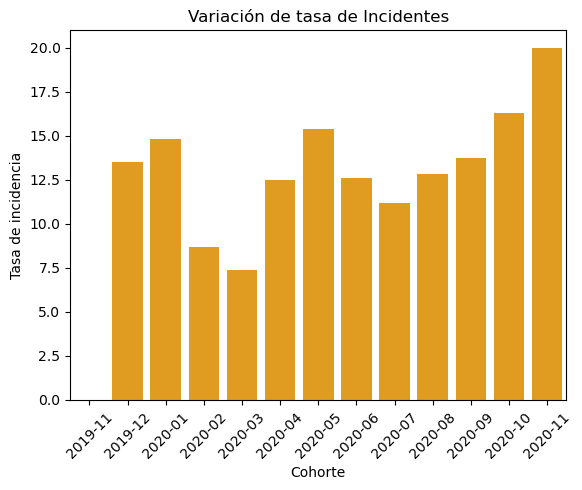

In [74]:
sns.barplot(data=table_merged, x="created_at", y="Incident_rate", color="orange")
plt.xticks(rotation=45)
plt.title("Variación de tasa de Incidentes")
plt.xlabel("Cohorte")
plt.ylabel("Tasa de incidencia")
plt.show()

In [75]:
## Sacar únicamente los porcenajes de 2020
table_merged_2020 = table_merged[table_merged['created_at'].dt.year == 2020]

fig, axes = plt.subplots(3, 4, figsize=(12, 10))
axes = axes.flatten()

# Crear cada mini pie chart
for i, (idx, row) in enumerate(table_merged_2020.iterrows()):
    axes[i].pie(
        [row['Incident_rate'], 100 - row['Incident_rate']],
        autopct=lambda p: f"{row['Incident_rate']:.1f}%" if p > 0 and p < 50 else "",
        startangle=90,
        colors=['#2196F3', '#ABD9FF'],
        textprops={'fontsize': 9},
        wedgeprops={'edgecolor': 'white'},
    )
    axes[i].set_title(f"Cohorte {row['created_at']}", fontsize=10)

# Quitar el vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
# Ajustes de espaciado
plt.suptitle("Promedio de incidentes por cohorte", fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# 3 - Ganancias generadas por cohorte

In [76]:
# Punto 3: Ganancias por Cohorte
coho_mes = df_fees_with_cohort.groupby('created_at_x')['total_amount'].sum()
coho_mes

created_at_x
2020-05       80.0
2020-06     3845.0
2020-07     8095.0
2020-08    15260.0
2020-09    22860.0
2020-10    53835.0
2020-11     1335.0
Freq: M, Name: total_amount, dtype: float64

In [77]:
mes_users = df_fees_with_cohort.groupby('created_at_x')['user_id'].nunique()
mes_users

created_at_x
2020-05      14
2020-06     401
2020-07     924
2020-08    2030
2020-09    3239
2020-10    7763
2020-11     236
Freq: M, Name: user_id, dtype: int64

In [78]:
mes_users_ren = mes_users.rename({'total_amount':'total_amount_other'})
mes_users = pd.merge(coho_mes, mes_users, on='created_at_x', how='left', suffixes=('', '_other'))
mes_users


total_amount  user_id
created_at_x                       
2020-05               80.0       14
2020-06             3845.0      401
2020-07             8095.0      924
2020-08            15260.0     2030
2020-09            22860.0     3239
2020-10            53835.0     7763
2020-11             1335.0      236

In [79]:
# PUNTO 3: KPI 
# Ingresos generados por grupos 
mes_users['LTV'] = mes_users['total_amount']/mes_users['user_id']
mes_users = mes_users.rename(columns={
    'created_at_x': 'cohort',
    'total_amount': 'Total amount per cohort',
    'user_id': 'Total users per cohort',
})
mes_users

Total amount per cohort  Total users per cohort       LTV
created_at_x                                                           
2020-05                          80.0                      14  5.714286
2020-06                        3845.0                     401  9.588529
2020-07                        8095.0                     924  8.760823
2020-08                       15260.0                    2030  7.517241
2020-09                       22860.0                    3239  7.057734
2020-10                       53835.0                    7763  6.934819
2020-11                        1335.0                     236  5.656780

In [80]:
mes_users.index.names = ['cohort']
mes_users

Total amount per cohort  Total users per cohort       LTV
cohort                                                            
2020-05                     80.0                      14  5.714286
2020-06                   3845.0                     401  9.588529
2020-07                   8095.0                     924  8.760823
2020-08                  15260.0                    2030  7.517241
2020-09                  22860.0                    3239  7.057734
2020-10                  53835.0                    7763  6.934819
2020-11                   1335.0                     236  5.656780

In [81]:
mes_users = mes_users.reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Barras: Total amount per cohort ---
sns.barplot(
    x=mes_users.index,
    y='Total amount per cohort',
    data=mes_users,
    color='skyblue',
    alpha=0.7,
    ax=ax1
)
ax1.set_ylabel('Ingresos totales', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# --- Línea: LTV (eje secundario) ---
ax2 = ax1.twinx()
sns.lineplot(
    x=mes_users.index,
    y='LTV',
    data=mes_users,
    color='crimson',
    marker='o',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel('LTV', color='crimson')
ax1.set_xlabel('Cohorte', color='blue')
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title('Ingresos Totales vs LTV por cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
# La gráfica nos dice que con el paso del tiempo hay más usuarios (total) pero que aportan menos (LTV) 

<Axes: xlabel='cohort', ylabel='LTV'>

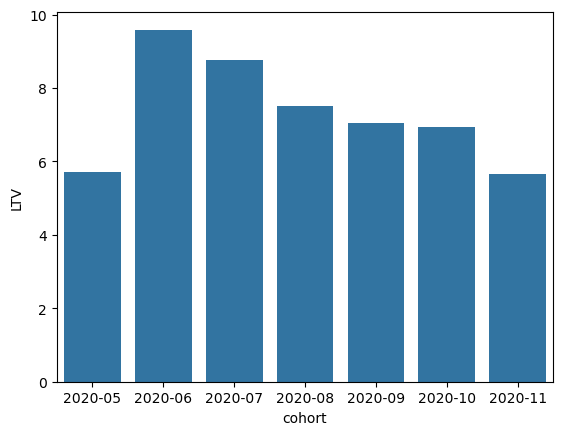

In [83]:
sns.barplot(data=mes_users, x="cohort", y="LTV")

# 4 - Nueva métrica: Velocidad de rembolso

In [85]:
df_nueva_metrica = pd.read_csv("extract - cash request - data analyst.csv")
# Convertimos las columnas de fecha al formato correcto 

date_columns = ['created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 
                     'cash_request_received_date', 'money_back_date', 'send_at', 
                     'reco_creation', 'reco_last_update']  # Lista de columnas de fecha

for col in date_columns:
    if col in df_nueva_metrica.columns:
        df_nueva_metrica[col] = pd.to_datetime(df_nueva_metrica[col], errors='coerce')  # Convertir a datetime


for col in date_columns:
    if col in df_nueva_metrica.columns:
        df_nueva_metrica[col] = df_nueva_metrica[col].dt.to_period('D')

/var/folders/qg/0hnz227j1q57fl6qr3kll7g00000gn/T/ipykernel_94070/1940093531.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_nueva_metrica[col] = df_nueva_metrica[col].dt.to_period('D')


In [86]:
df_nueva_metrica_clean = df_nueva_metrica.dropna(subset=['money_back_date', 'cash_request_received_date'])
df_nueva_metrica_clean

id  amount      status  created_at  updated_at  user_id  \
5       2145   100.0  money_back  2020-05-23  2020-07-06   9489.0   
11      1794   100.0  money_back  2020-05-14  2020-06-03    778.0   
13      2122   100.0  money_back  2020-05-22  2020-06-13   8218.0   
43      1629   100.0  money_back  2020-05-08  2020-06-10   9068.0   
54       817   100.0  money_back  2020-03-07  2020-04-14   3162.0   
...      ...     ...         ...         ...         ...      ...   
23964  16834   100.0  money_back  2020-09-19  2021-02-05  20064.0   
23965  20616   100.0  money_back  2020-10-12  2021-02-06  13681.0   
23966  25243    50.0  money_back  2020-10-27  2020-12-18      NaN   
23967  22357   100.0  money_back  2020-10-20  2021-02-05  82122.0   
23968  20256   100.0  money_back  2020-10-10  2021-02-05  64517.0   

      moderated_at  deleted_account_id reimbursement_date  \
5       2020-05-24                 NaN                NaT   
11      2020-05-15                 NaN         2020-05-29   
13      2020-05-23                 NaN                NaT   
43      2020-05-08                 NaN                NaT   
54      2020-03-08                 NaN         2020-04-06   
...            ...                 ...                ...   
23964   2020-09-19                 NaN                NaT   
23965          NaT                 NaN                NaT   
23966          NaT             30367.0                NaT   
23967          NaT                 NaN                NaT   
23968          NaT                 NaN                NaT   

      cash_request_received_date money_back_date transfer_type     send_at  \
5                     2020-05-26      2020-07-06       regular         NaT   
11                    2020-05-17      2020-06-03       regular         NaT   
13                    2020-05-27      2020-06-13       regular         NaT   
43                    2020-05-12      2020-06-10       regular         NaT   
54                    2020-03-10      2020-04-14       regular         NaT   
...                          ...             ...           ...         ...   
23964                 2020-09-22      2021-02-05       instant  2020-09-26   
23965                 2020-10-13      2021-02-06       instant  2020-10-12   
23966                 2020-10-28      2020-12-01       instant  2020-10-27   
23967                 2020-10-21      2021-02-05       instant  2020-10-20   
23968                 2020-10-12      2021-02-05       instant  2020-10-10   

      recovery_status reco_creation reco_last_update  
5           completed    2020-06-12       2020-07-06  
11          completed    2020-05-29       2020-06-03  
13                NaN           NaT              NaT  
43                NaN           NaT              NaT  
54                NaN           NaT              NaT  
...               ...           ...              ...  
23964       completed    2020-10-15       2021-02-05  
23965             NaN           NaT              NaT  
23966       completed    2020-11-12       2020-12-01  
23967             NaN           NaT              NaT  
23968             NaN           NaT              NaT  

[11237 rows x 16 columns]

In [87]:
# =========================
# 7. Métrica 4 propuesta: Velocidad de repago
# =========================
# Interpretación: ¿Cuántos días tardan en devolver el dinero?
# payback_delay_days = money_back_date - cash_request_received_date

# Aseguramos que estas columnas sean datetime naive (ya las parseamos arriba)
if "money_back_date" in df_nueva_metrica_clean.columns and "cash_request_received_date" in df_nueva_metrica_clean.columns:
    # algunas filas pueden venir con NaT -> resta segura con dt.days
    payback_delay_days = (
        df_nueva_metrica_clean["money_back_date"] - df_nueva_metrica_clean["cash_request_received_date"]
    )
    df_nueva_metrica_clean["payback_delay_days"] = payback_delay_days
else:
    df_nueva_metrica_clean["payback_delay_days"] = np.nan



/var/folders/qg/0hnz227j1q57fl6qr3kll7g00000gn/T/ipykernel_94070/3487497665.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nueva_metrica_clean["payback_delay_days"] = payback_delay_days


In [88]:
df_nueva_metrica_clean[['payback_delay_days', 'user_id']]

payback_delay_days  user_id
5            <41 * Days>   9489.0
11           <17 * Days>    778.0
13           <17 * Days>   8218.0
43           <29 * Days>   9068.0
54           <35 * Days>   3162.0
...                  ...      ...
23964       <136 * Days>  20064.0
23965       <116 * Days>  13681.0
23966        <34 * Days>      NaN
23967       <107 * Days>  82122.0
23968       <116 * Days>  64517.0

[11237 rows x 2 columns]

In [89]:
df_nueva_metrica_clean.sort_values(['payback_delay_days', 'user_id'], ascending=[False, True])

id  amount                 status  created_at  updated_at  user_id  \
7858     294   100.0  direct_debit_rejected  2019-12-23  2021-01-28   1518.0   
7041     274   100.0             money_back  2019-12-21  2020-11-04   1139.0   
7313     280   100.0             money_back  2019-12-21  2020-11-04   3161.0   
9869     359   100.0             money_back  2020-01-01  2020-11-04    610.0   
9874     474   100.0             money_back  2020-01-18  2020-12-02   1378.0   
...      ...     ...                    ...         ...         ...      ...   
21792  26998   100.0             money_back  2020-11-01  2020-12-18  95838.0   
15797  26730    25.0             money_back  2020-10-31  2020-12-18  97737.0   
18329  19448    50.0             money_back  2020-10-06  2020-12-18      NaN   
19443  21236    10.0             money_back  2020-10-15  2020-12-18      NaN   
21838  20767    10.0             money_back  2020-10-13  2020-12-18      NaN   

      moderated_at  deleted_account_id reimbursement_date  \
7858    2019-12-24                 NaN                NaT   
7041    2019-12-21                 NaN                NaT   
7313           NaT               262.0                NaT   
9869    2020-01-02                 NaN                NaT   
9874    2020-01-19                 NaN                NaT   
...            ...                 ...                ...   
21792          NaT                 NaN                NaT   
15797          NaT                 NaN                NaT   
18329          NaT             10136.0         2020-10-21   
19443          NaT             17179.0         2020-10-30   
21838          NaT             17179.0                NaT   

      cash_request_received_date money_back_date transfer_type     send_at  \
7858                  2019-12-28      2020-12-23       regular         NaT   
7041                  2019-12-23      2020-11-23       regular         NaT   
7313                  2019-12-24      2020-11-23       regular         NaT   
9869                  2020-01-03      2020-11-23       regular         NaT   
9874                  2020-01-21      2020-12-03       regular         NaT   
...                          ...             ...           ...         ...   
21792                 2020-11-03      2020-11-03       instant  2020-11-01   
15797                 2020-11-01      2020-11-01       instant  2020-10-31   
18329                 2020-10-07      2020-10-07       instant  2020-10-13   
19443                 2020-10-16      2020-10-16       instant  2020-10-15   
21838                 2020-10-14      2020-10-14       instant  2020-10-13   

      recovery_status reco_creation reco_last_update payback_delay_days  
7858          pending    2020-03-20       2021-01-28       <361 * Days>  
7041        completed    2020-03-20       2020-07-24       <336 * Days>  
7313        completed    2020-03-20       2020-03-31       <335 * Days>  
9869        completed    2020-03-20       2020-03-31       <325 * Days>  
9874        completed    2020-05-26       2020-12-02       <317 * Days>  
...               ...           ...              ...                ...  
21792             NaN           NaT              NaT         <0 * Days>  
15797             NaN           NaT              NaT         <0 * Days>  
18329             NaN           NaT              NaT         <0 * Days>  
19443             NaN           NaT              NaT         <0 * Days>  
21838             NaN           NaT              NaT         <0 * Days>  

[11237 rows x 17 columns]

In [90]:
df_nueva_metrica_clean.to_csv('df_nueva_metrica_clean.csv', index=False) # Posterior análisis en Tableau